In [1]:
# library(reshape)
library(ggthemes)
library(ggplot2)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
mashr_dir = "/hps/nobackup/hipsci/scratch/GTEx/MASHR_OUT/Anna_Brain_sc/"

In [3]:
list.files(mashr_dir)

[1] "MASHR_local_false_sign_rate_sc_brain.txt"           
[2] "MASHR_pairwise_sharing_F0.05_same_sign_sc_brain.txt"
[3] "MASHR_pairwise_sharing_same_sign_sc_brain.txt"      
[4] "MASHR_posterior_mean_sc_brain.txt"                  
[5] "MASHR_posterior_standard_deviation_sc_brain.txt"    
[6] "MASHR_Results.OriginalCovariance.sc_brain.Rdata"    
[7] "MASHR_significant_effects_iPSC_sc_brain.txt"        
[8] "MASHR_significant_effects_sc_brain.txt"

In [4]:
sign_res = paste0(mashr_dir,"MASHR_local_false_sign_rate_sc_brain.txt")
mean_beta = paste0(mashr_dir,"MASHR_posterior_mean_sc_brain.txt")
# std_beta = paste0(mashr_dir,"MASHR_posterior_standard_deviation_sc_brain.txt")

In [5]:
##Functions
reorder_cormat <- function(cormat){
  # Use correlation between variables as distance
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd,method="complete")
  cormat <-cormat[hc$order, hc$order]
}

In [6]:
get_upper_tri <- function(cormat){
  cormat[upper.tri(cormat)]<- NA
  return(cormat)
}

In [7]:
# local false sign rate (lfsr)
lfsrMat = read.delim(sign_res,as.is=T, row.names=1)
posteriorMean = read.delim(mean_beta,as.is=T, row.names=1)

In [8]:
nrow(lfsrMat)
ncol(lfsrMat)

[1] 7975

[1] 29

In [9]:
colnames(lfsrMat)

[1] "iPSC"                                 
 [2] "Brain_Amygdala"                       
 [3] "Brain_Anterior_cingulate_cortex_BA24" 
 [4] "Brain_Caudate_basal_ganglia"          
 [5] "Brain_Cerebellar_Hemisphere"          
 [6] "Brain_Cerebellum"                     
 [7] "Brain_Cortex"                         
 [8] "Brain_Frontal_Cortex_BA9"             
 [9] "Brain_Hippocampus"                    
[10] "Brain_Hypothalamus"                   
[11] "Brain_Nucleus_accumbens_basal_ganglia"
[12] "Brain_Putamen_basal_ganglia"          
[13] "Brain_Spinal_cord_cervical_c.1"       
[14] "Brain_Substantia_nigra"               
[15] "Pituitary"                            
[16] "Neuro.pool1_13_noddd_D11.FPP"         
[17] "Neuro.pool1_13_noddd_D11.P_FPP"       
[18] "Neuro.pool1_13_noddd_D30.Astro"       
[19] "Neuro.pool1_13_noddd_D30.DA"          
[20] "Neuro.pool1_13_noddd_D30.Epen1"       
[21] "Neuro.pool1_13_noddd_D30.Sert"        
[22] "Neuro.pool1_17_D52.ROT.Astro"         
[23] "Neuro.pool1_17_D52.ROT.DA"            
[24] "Neuro.pool1_17_D52.ROT.Epen1"         
[25] "Neuro.pool1_17_D52.ROT.Sert"          
[26] "Neuro.pool1_17_D52.Astro"             
[27] "Neuro.pool1_17_D52.DA"                
[28] "Neuro.pool1_17_D52.Epen1"             
[29] "Neuro.pool1_17_D52.Sert"

In [10]:
head(lfsrMat,2)

,iPSC,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,Brain_Cerebellum,Brain_Cortex,Brain_Frontal_Cortex_BA9,Brain_Hippocampus,Brain_Hypothalamus,...,Neuro.pool1_13_noddd_D30.Epen1,Neuro.pool1_13_noddd_D30.Sert,Neuro.pool1_17_D52.ROT.Astro,Neuro.pool1_17_D52.ROT.DA,Neuro.pool1_17_D52.ROT.Epen1,Neuro.pool1_17_D52.ROT.Sert,Neuro.pool1_17_D52.Astro,Neuro.pool1_17_D52.DA,Neuro.pool1_17_D52.Epen1,Neuro.pool1_17_D52.Sert
1_100291080_C_T-ENSG00000156875,0.55240246,0.2661899980,2.948368e-01,2.933655e-01,3.891269e-01,3.688221e-01,0.3244183043,0.354748408,0.3113482930,0.28314784,...,0.4207356,0.3957638,0.3483573,0.3480076,0.3770463,0.3279490,0.3655997,0.4063143,0.3795389,0.3653451
1_100373730_G_A-ENSG00000162688,0.00861245,0.0007134121,9.319428e-05,2.174763e-05,2.322760e-07,6.200034e-07,0.0001547294,0.002938566,0.0001856247,0.03353521,...,0.4630622,0.3252611,0.3656837,0.3230259,0.4115617,0.3048215,0.3537931,0.4362284,0.4845384,0.3328717


In [11]:
ratio = 2 # ratio of magnitude between 0.5 and 2 is "same signal"
lfsrThreshold = 0.1 # significance threshold
any = T       # at least one passing significance
both = F      # both passing significance
smallest = F  # smallest sample size set passing significance

In [12]:
sameSignMagnitude = matrix(0, ncol=ncol(lfsrMat), nrow=ncol(lfsrMat))# check sign thr + same sign + ratio 
sameSign = matrix(0, ncol=ncol(lfsrMat), nrow=ncol(lfsrMat))         # check sign thr + same sign
total = matrix(0, ncol=ncol(lfsrMat), nrow=ncol(lfsrMat))            # check only sign threshold

In [13]:
options(warn=2)
if(sum(any, both, smallest)==1){
  for(colN in 1:ncol(lfsrMat)){
    for(colM in colN:ncol(lfsrMat)){
      if(any){
        toConsider = unique(c(which(lfsrMat[,colN]<lfsrThreshold),which(lfsrMat[,colM]<lfsrThreshold)))
      } else if(both) {
        toConsider = intersect(which(lfsrMat[,colN]<lfsrThreshold),which(lfsrMat[,colM]<lfsrThreshold))
      } else if(smallest){
        if(sampleSizeTissues$n[colN] > sampleSizeTissues$n[colM]){
          toConsider = which(lfsrMat[,colM]<lfsrThreshold)
        } else {
          toConsider = which(lfsrMat[,colN]<lfsrThreshold)
        }
      }
      total[colN,colM] = length(toConsider)
      total[colM,colN] = total[colN,colM]
      
      tmpInfo = posteriorMean[toConsider,colN]/posteriorMean[toConsider,colM] # check sign
      tmpInfo2 = tmpInfo[which(tmpInfo>0)]
      sameSign[colN,colM] = length(tmpInfo2)
      sameSign[colM,colN] = sameSign[colN,colM]
      
      tmpInfo2[which(tmpInfo2<1)] = 1/tmpInfo2[which(tmpInfo2<1)] # check magn ratio
      sameSignMagnitude[colN,colM] = length(which(tmpInfo2<=ratio))
      sameSignMagnitude[colM,colN] = sameSignMagnitude[colN,colM]
    }
  }
} else {
  print("Setting issue.")
}

In [14]:
# options(warn=1)

pairwiseSharingSign = sameSign/total # get fraction
pairwiseSharing = sameSignMagnitude/total

colnames(pairwiseSharing) = colnames(lfsrMat)
rownames(pairwiseSharing) = colnames(lfsrMat)
colnames(pairwiseSharingSign) = colnames(lfsrMat)
rownames(pairwiseSharingSign) = colnames(lfsrMat)

## Sign and magnitude
# upper_tri <- get_upper_tri(reorder_cormat(as.matrix(pairwiseSharing)))
## Sign only
# upper_tri <- get_upper_tri(reorder_cormat(as.matrix(pairwiseSharingSign)))
# melted_cormat <- melt(upper_tri, na.rm = TRUE)
# head(melted_cormat)

In [15]:
col_ips = canva_pal("Modern and clean")(4)[2]
col_mesendo = canva_pal("Modern and clean")(4)[4]
col_defendo = canva_pal("Warm tones")(4)[3]

col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
# col_Astro = "#d62728"
col_Astro = "#9467bd"

In [16]:
colnames(pairwiseSharing)

[1] "iPSC"                                 
 [2] "Brain_Amygdala"                       
 [3] "Brain_Anterior_cingulate_cortex_BA24" 
 [4] "Brain_Caudate_basal_ganglia"          
 [5] "Brain_Cerebellar_Hemisphere"          
 [6] "Brain_Cerebellum"                     
 [7] "Brain_Cortex"                         
 [8] "Brain_Frontal_Cortex_BA9"             
 [9] "Brain_Hippocampus"                    
[10] "Brain_Hypothalamus"                   
[11] "Brain_Nucleus_accumbens_basal_ganglia"
[12] "Brain_Putamen_basal_ganglia"          
[13] "Brain_Spinal_cord_cervical_c.1"       
[14] "Brain_Substantia_nigra"               
[15] "Pituitary"                            
[16] "Neuro.pool1_13_noddd_D11.FPP"         
[17] "Neuro.pool1_13_noddd_D11.P_FPP"       
[18] "Neuro.pool1_13_noddd_D30.Astro"       
[19] "Neuro.pool1_13_noddd_D30.DA"          
[20] "Neuro.pool1_13_noddd_D30.Epen1"       
[21] "Neuro.pool1_13_noddd_D30.Sert"        
[22] "Neuro.pool1_17_D52.ROT.Astro"         
[23] "Neuro.pool1_17_D52.ROT.DA"            
[24] "Neuro.pool1_17_D52.ROT.Epen1"         
[25] "Neuro.pool1_17_D52.ROT.Sert"          
[26] "Neuro.pool1_17_D52.Astro"             
[27] "Neuro.pool1_17_D52.DA"                
[28] "Neuro.pool1_17_D52.Epen1"             
[29] "Neuro.pool1_17_D52.Sert"

In [20]:
# mat_to_plot = pairwiseSharing[c(2:15),c(1,16:29)]
mat_to_plot = pairwiseSharing[c(2:15),c(1,16:29,14)]
# mat_to_plot = pairwiseSharingSign[c(2:15),c(1,16:29)] 
tail(mat_to_plot)

,iPSC,Neuro.pool1_13_noddd_D11.FPP,Neuro.pool1_13_noddd_D11.P_FPP,Neuro.pool1_13_noddd_D30.Astro,Neuro.pool1_13_noddd_D30.DA,Neuro.pool1_13_noddd_D30.Epen1,Neuro.pool1_13_noddd_D30.Sert,Neuro.pool1_17_D52.ROT.Astro,Neuro.pool1_17_D52.ROT.DA,Neuro.pool1_17_D52.ROT.Epen1,Neuro.pool1_17_D52.ROT.Sert,Neuro.pool1_17_D52.Astro,Neuro.pool1_17_D52.DA,Neuro.pool1_17_D52.Epen1,Neuro.pool1_17_D52.Sert,Brain_Substantia_nigra
Brain_Hypothalamus,0.3497781,0.3474227,0.3466437,0.3746907,0.3513418,0.3794201,0.3575478,0.3646018,0.3747741,0.3926924,0.4014011,0.3675946,0.4100642,0.3875833,0.4053110,0.8247341
Brain_Nucleus_accumbens_basal_ganglia,0.3449896,0.3472603,0.3447087,0.3680141,0.3522211,0.3618881,0.3479944,0.3620629,0.3640586,0.3828070,0.3902523,0.3607483,0.3891626,0.3821478,0.3876987,0.7862389
Brain_Putamen_basal_ganglia,0.3317672,0.3406293,0.3374486,0.3595388,0.3355470,0.3578397,0.3447672,0.3512658,0.3517730,0.3674825,0.3827801,0.3452045,0.3854240,0.3730929,0.3831840,0.8068403
Brain_Spinal_cord_cervical_c.1,0.3406275,0.3356841,0.3343927,0.3655720,0.3410488,0.3655371,0.3565723,0.3563093,0.3480663,0.3698878,0.3760286,0.3608473,0.3732702,0.3649374,0.3852752,0.8101161
Brain_Substantia_nigra,0.3620553,0.3537487,0.3514276,0.3838897,0.3579176,0.3826087,0.3670058,0.3806569,0.3773234,0.3946318,0.4125899,0.3727073,0.4015345,0.3948313,0.4127325,1.0000000
Pituitary,0.3762223,0.3282137,0.3327759,0.3560192,0.3111339,0.3605605,0.3369863,0.3449812,0.3324128,0.3702434,0.3793688,0.3407049,0.3706485,0.3707102,0.3839406,0.6943729


In [21]:
mat_to_plot['Brain_Substantia_nigra','Brain_Substantia_nigra'] = mean(mat_to_plot[!(rownames(mat_to_plot) %in% 'Brain_Substantia_nigra'),'Brain_Substantia_nigra'])

In [22]:
options(repr.plot.width=8, repr.plot.height=6)
df = as.data.frame(mat_to_plot) %>% 
  gather(key="CellType", value="Sharing")

head(df,2)

CellType,Sharing
iPSC,0.3356881
iPSC,0.3526809


In [23]:
ncol(mat_to_plot)
colnames(mat_to_plot)

[1] 16

[1] "iPSC"                           "Neuro.pool1_13_noddd_D11.FPP"  
 [3] "Neuro.pool1_13_noddd_D11.P_FPP" "Neuro.pool1_13_noddd_D30.Astro"
 [5] "Neuro.pool1_13_noddd_D30.DA"    "Neuro.pool1_13_noddd_D30.Epen1"
 [7] "Neuro.pool1_13_noddd_D30.Sert"  "Neuro.pool1_17_D52.ROT.Astro"  
 [9] "Neuro.pool1_17_D52.ROT.DA"      "Neuro.pool1_17_D52.ROT.Epen1"  
[11] "Neuro.pool1_17_D52.ROT.Sert"    "Neuro.pool1_17_D52.Astro"      
[13] "Neuro.pool1_17_D52.DA"          "Neuro.pool1_17_D52.Epen1"      
[15] "Neuro.pool1_17_D52.Sert"        "Brain_Substantia_nigra"

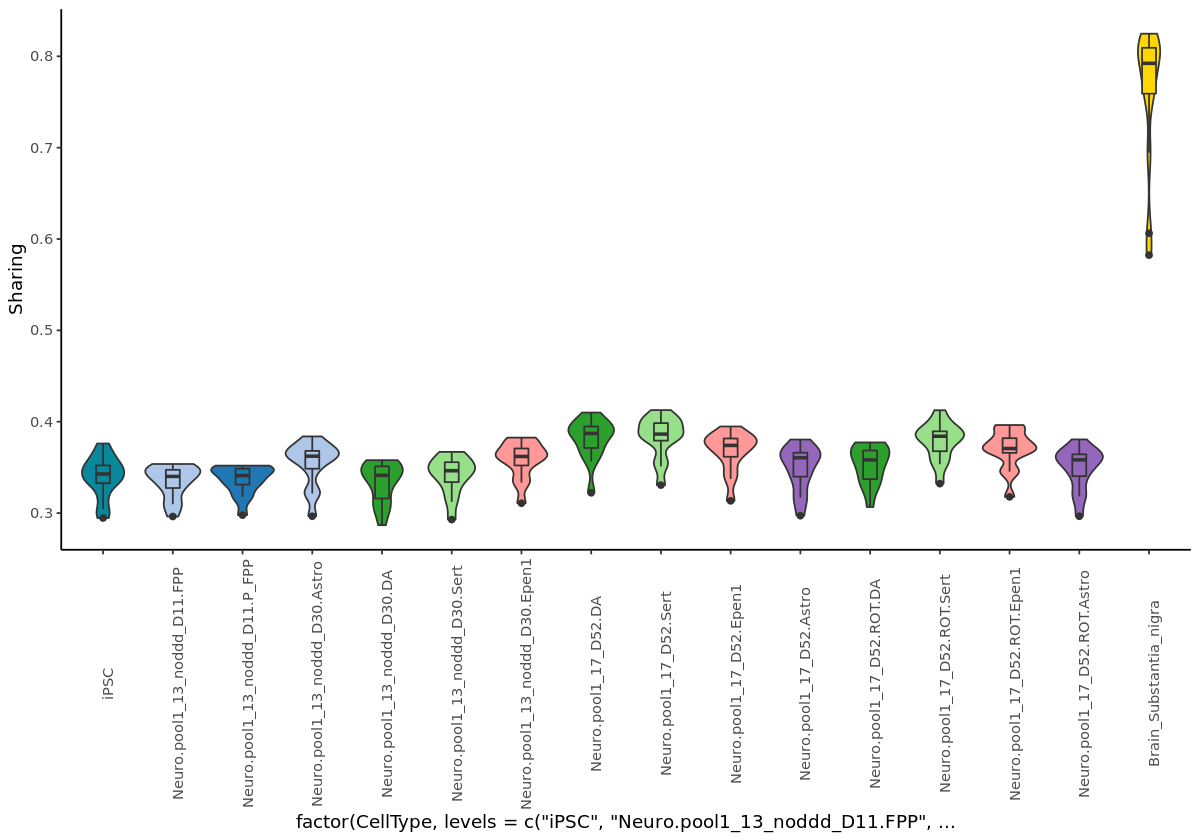

In [26]:
options(repr.plot.width=10, repr.plot.height=7)
p = ggplot(df,aes(x=factor(CellType, levels=c("iPSC",
                                          "Neuro.pool1_13_noddd_D11.FPP","Neuro.pool1_13_noddd_D11.P_FPP",
                                          "Neuro.pool1_13_noddd_D30.Astro","Neuro.pool1_13_noddd_D30.DA",
                                          "Neuro.pool1_13_noddd_D30.Sert","Neuro.pool1_13_noddd_D30.Epen1",
                                          "Neuro.pool1_17_D52.DA","Neuro.pool1_17_D52.Sert",
                                          "Neuro.pool1_17_D52.Epen1","Neuro.pool1_17_D52.Astro",
                                          "Neuro.pool1_17_D52.ROT.DA","Neuro.pool1_17_D52.ROT.Sert",
                                          "Neuro.pool1_17_D52.ROT.Epen1","Neuro.pool1_17_D52.ROT.Astro",
                                          "Brain_Substantia_nigra")), 
              y=Sharing, 
              fill=factor(CellType, levels=c("iPSC",
                                          "Neuro.pool1_13_noddd_D11.FPP","Neuro.pool1_13_noddd_D11.P_FPP",
                                          "Neuro.pool1_13_noddd_D30.Astro","Neuro.pool1_13_noddd_D30.DA",
                                          "Neuro.pool1_13_noddd_D30.Sert","Neuro.pool1_13_noddd_D30.Epen1",
                                          "Neuro.pool1_17_D52.DA","Neuro.pool1_17_D52.Sert",
                                          "Neuro.pool1_17_D52.Epen1","Neuro.pool1_17_D52.Astro",
                                          "Neuro.pool1_17_D52.ROT.DA","Neuro.pool1_17_D52.ROT.Sert",
                                          "Neuro.pool1_17_D52.ROT.Epen1","Neuro.pool1_17_D52.ROT.Astro",
                                          "Brain_Substantia_nigra")))) +  
    geom_violin() + 
    geom_boxplot(width = 0.2) + scale_fill_manual(values = c(col_ips,
                            col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            "gold"))+ theme_classic() + 
                            theme(legend.position = "none", axis.text.x = element_text(angle = 90)) 
p

In [27]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"

pdf(paste0(fig_dir,"Supp_Fig_6b.pdf"), width=10, height=7)
p
dev.off()

png 
  2